In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Circle
from tqdm import notebook

In [ ]:
class Grid_World: 
    def __init__(self, size, walls, punishment, prize): # Create grid as numpy matrix, add random walls, and prize at bottom right corner. 
        self.size = size
        self.punishment = punishment
        self.prize = prize
        self.grid = np.zeros((self.size, self.size)) 
        self.grid[self.size - 1, self.size - 1] = prize # Set bottom right corner to be prize. 
        for i in range(walls): 
            span = np.arange(0, size)
            coordinates = tuple((np.random.choice(span), np.random.choice(span))) # Add walls randomly. 
            if coordinates == (0, 0) or coordinates == (self.size - 1, self.size - 1): # Don't add walls at starting point or prize location. 
                continue
            else: 
                self.grid[coordinates] = punishment
        self.start_state = (0, 0)
        self.state = self.start_state
    def show_grid(self): 
        fig, ax = plt.subplots()  
        cmap = ListedColormap(['tomato', 'white', 'limegreen']) # Color-code grid cells. 
        bounds = [self.punishment - 1, -0.5, 0.5, self.prize + 1]  
        norm = BoundaryNorm(bounds, cmap.N) 
        im = ax.imshow(self.grid.T, cmap=cmap, norm=norm)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('Grid World') 
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                value = self.grid[i, j]
                ax.text(i, j, f'{value:.0f}', ha='center', va='center')
        ax.add_patch(Circle(self.state, radius=0.4, color='royalblue', fill=False, lw=3)) # Add blue circle at current location of agent. 
        plt.tight_layout()
        plt.show()
    def reset(self):
        self.state = self.start_state # Reset grid world to starting state, use at beginning of every episode. 
        return self.state
    def is_completed(self, state): 
        return self.grid[state] == self.prize # Marks end of episode. 
    def get_next_state(self, state, action): # Move agent in environment, based on grid coordinate system. 
        next_state = list(state)
        if action == 0: # Up. 
            next_state[1] = max(0, state[1] - 1)
        elif action == 1: # Down.  
            next_state[1] = min(self.size - 1, state[1] + 1)
        elif action == 2: # Right. 
            next_state[0] = min(self.size - 1, state[0] + 1)
        elif action == 3: # Left. 
            next_state[0] = max(0, state[0] - 1)
        return tuple(next_state)
    def step(self, action): # Forward step of environment, based on action chosen by agent. 
        next_state = self.get_next_state(self.state, action)
        reward = int(self.grid[next_state])
        self.state = next_state
        done = bool(self.is_completed(next_state))
        return next_state, reward, done

In [ ]:
class Q_Agent: 
    def __init__(self, size, learning_rate, discount_factor, epsilon): # Define hyperparameters and initialize Q-table. 
        self.size = size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((self.size, self.size, 4))
    def reset(self): # Reset Q-table at beginning of episode. 
        self.q_table = np.zeros((self.size, self.size, 4))
    def training(self): 
        self.mode = 0
    def testing(self): 
        self.mode = 1
    def choose_action(self, state): # Choose action using epsilon-greedy method. 
        if self.mode == 0: 
            if np.random.rand() < self.epsilon: 
                return int(np.random.choice([0, 1, 2, 3]))
            else: 
                return int(np.argmax(self.q_table[state]))
        elif self.mode == 1: 
            return int(np.argmax(self.q_table[state]))
    def step(self, state, action, reward, next_state): # Implementation of Q-learning algorithm. 
        max_next_q = np.max(self.q_table[next_state])
        current_q = self.q_table[state][action]
        self.q_table[state][action] = current_q + self.learning_rate * (reward + self.discount_factor * max_next_q - current_q)

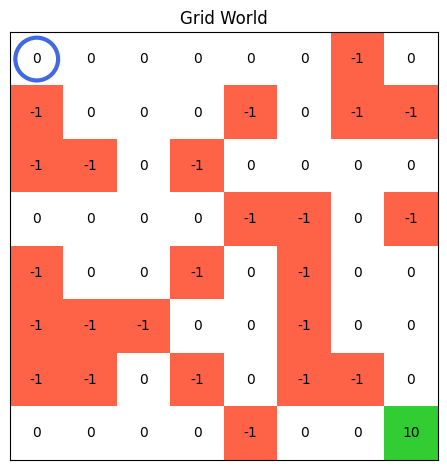

In [ ]:
# Setup environment and agent hyperparameters, display gridworld. 

SIZE = 8
WALLS = 30
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
EPSILON = 0.3
EPISODES = 100
RANDOM_SEED = 10

np.random.seed(RANDOM_SEED)
environment = Grid_World(SIZE, WALLS, punishment=-1, prize=10)
agent = Q_Agent(SIZE, LEARNING_RATE, DISCOUNT_FACTOR, EPSILON, )
environment.show_grid()

  0%|          | 0/100 [00:00<?, ?it/s]

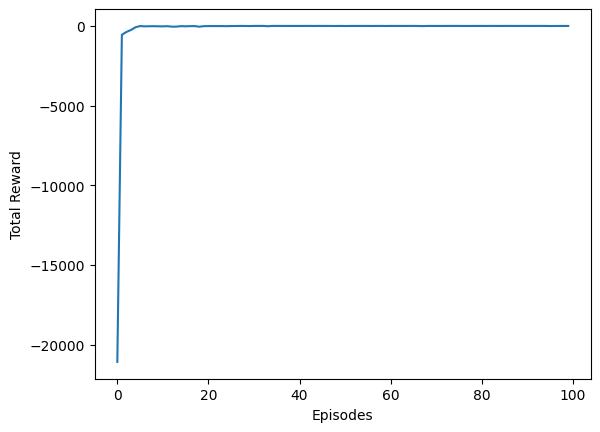

In [ ]:
# Agent training loop. Shows graph of reward for each episode. 

all_rewards = np.zeros(EPISODES)
agent.reset()
agent.training()
for episode in notebook.tqdm(range(EPISODES)): 
    state = environment.reset()
    completed = False
    while not completed: 
        action = agent.choose_action(state)
        next_state, reward, completed = environment.step(action)
        agent.step(state, action, reward, next_state)
        state = next_state
        all_rewards[episode] += reward 
plt.plot(all_rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()   

Obtained total reward of 10 after 14 moves. 
['Right', 'Right', 'Right', 'Right', 'Right', 'Down', 'Down', 'Right', 'Down', 'Down', 'Right', 'Down', 'Down', 'Down']


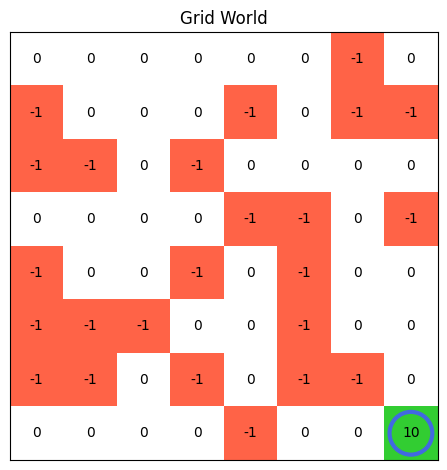

In [ ]:
# Set agent to evaluation mode, and outputs action sequence learned by agent. 

state = environment.reset()
agent.testing()
completed = False
moves = 0 
total_reward = 0 
actions = []
while not completed: 
    action = agent.choose_action(state)
    next_state, reward, completed = environment.step(action)
    state = next_state
    moves += 1 
    total_reward += reward 
    directions = {0:'Up', 1:'Down', 2:'Right', 3:'Left'}
    actions.append(directions.get(action))
print(f'Obtained total reward of {total_reward} after {moves} moves. ')
print(actions)
environment.show_grid()